In [2]:
## RUNNING APRIORI ALGORITHM ON FREQUENT MINING DATASET. 

In [3]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlxtend as xt

In [5]:
## READING THE DATASET

df = pd.read_csv('mbo.csv')
df

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## CONVERTING THE DATASET INTO A LIST OF LIST AND STORING IT IN 'ALL'

all = []
for i in range(df.shape[0]):
    all.append(df.iloc[i,:].dropna().to_list())

In [7]:
# CHECKING IF THE LENGTH OF THE LIST IS EQUAL TO THE ROWS OF THE DATAFRAME

if df.shape[0] == len(all):
    print("ALL GOOD")

ALL GOOD


In [8]:
flat = [x for i in all for x in i]

In [9]:
all

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

<Axes: >

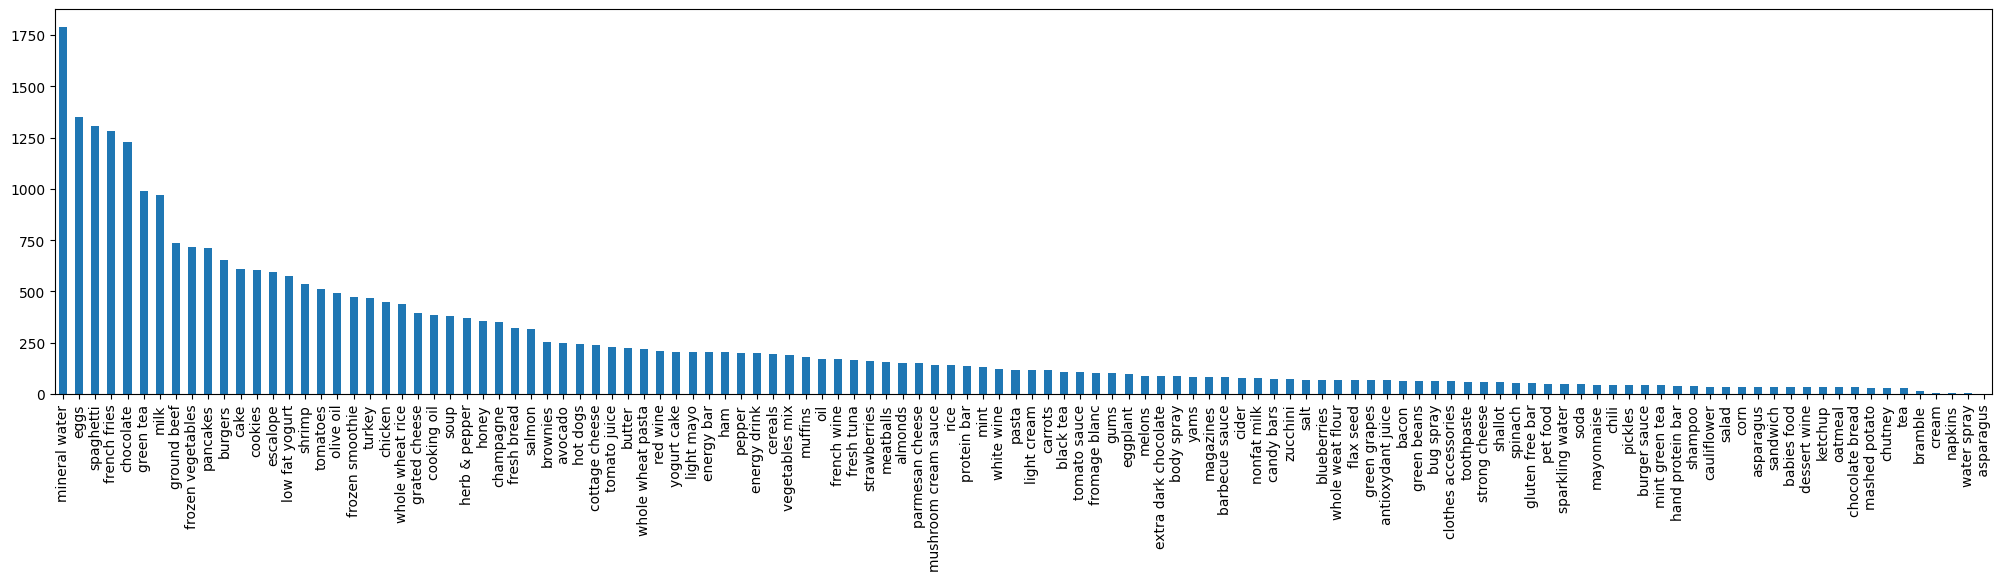

In [10]:
# PLOTTING ALL THE PRODUCTS AND THEIR FRQUENCY
pd.Series(flat).value_counts().plot(kind='bar', figsize=(25,5))

In [11]:
## SETTING UP THE DATA FOR FREQUENT ITEMSET
# TRANSACTION ENCODING TO SET UP THE ITEMS AS COLUMNS AND ROWS AS TRANSACTIONS

In [12]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(all).transform(all)
df = pd.DataFrame(te_ary, columns = te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
## SETTING UP THE ASSOCIATION RULES DATASET

In [151]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# set the minimum suppport as 1%, minimum confidence as 1%
ass = apriori(df, min_support=0.01, use_colnames=True)
rule = association_rules(ass, metric='confidence',  min_threshold=0.1, support_only=False)
rule['association'] = rule['antecedents'].apply(lambda x: list(x)[0]).astype("unicode") + '->' + rule['consequents'].apply(lambda x: list(x)[0]).astype("unicode")
drop  = [x for x in rule['association'] if 'mineral water' in x]
new_rule = rule.set_index('association')
new_rule.drop(drop,inplace=True)
new_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
association,,,,,,,,,,
cake->burgers,(cake),(burgers),0.081067,0.087200,0.011467,0.141447,1.622103,0.004398,1.063185,0.417349
burgers->cake,(burgers),(cake),0.087200,0.081067,0.011467,0.131498,1.622103,0.004398,1.058068,0.420154
burgers->chocolate,(burgers),(chocolate),0.087200,0.163867,0.017067,0.195719,1.194377,0.002777,1.039603,0.178291
chocolate->burgers,(chocolate),(burgers),0.163867,0.087200,0.017067,0.104150,1.194377,0.002777,1.018920,0.194639
burgers->eggs,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782,0.499351
...,...,...,...,...,...,...,...,...,...,...
ground beef->milk,(ground beef),"(milk, mineral water)",0.098267,0.048000,0.011067,0.112619,2.346223,0.006350,1.072820,0.636311
ground beef->spaghetti,"(ground beef, mineral water)",(spaghetti),0.040933,0.174133,0.017067,0.416938,2.394361,0.009939,1.416431,0.607207
milk->spaghetti,"(milk, mineral water)",(spaghetti),0.048000,0.174133,0.015733,0.327778,1.882338,0.007375,1.228562,0.492380


<Axes: ylabel='association'>

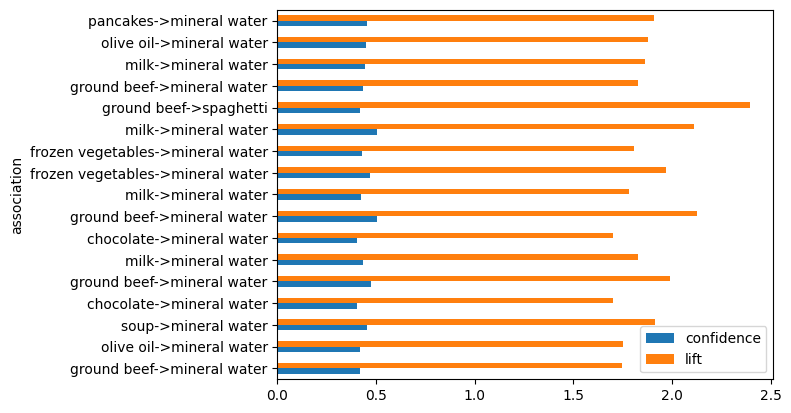

In [138]:
# using custom rules on itemsets. 
# lift > 1 and confidence > 40%
rule[(rule['confidence']>0.4) & (rule['lift']>1.2)][['association','confidence','lift']].set_index('association').plot(kind='barh')

<Axes: ylabel='association'>

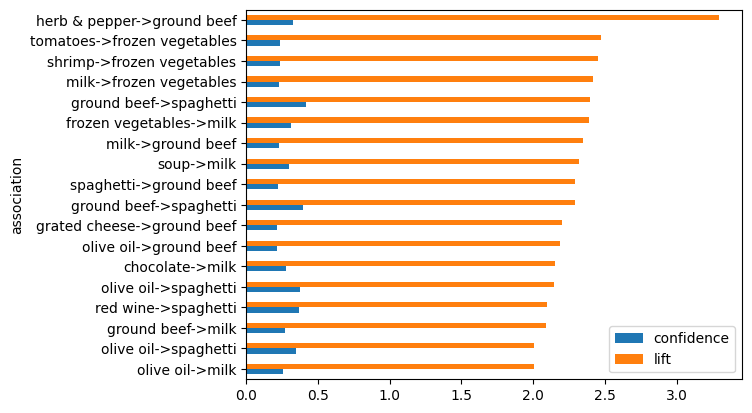

In [148]:
#removing mineral water because it will always be bought and drives lesser profit
new_rule[(new_rule['confidence']>0.2) & (new_rule['lift']>2)][['confidence','lift']].sort_values('lift').plot(kind='barh')

array([<Axes: title={'center': 'support'}, xlabel='association'>,
       <Axes: title={'center': 'confidence'}, xlabel='association'>,
       <Axes: title={'center': 'lift'}, xlabel='association'>,
       <Axes: title={'center': 'leverage'}, xlabel='association'>,
       <Axes: title={'center': 'conviction'}, xlabel='association'>],
      dtype=object)

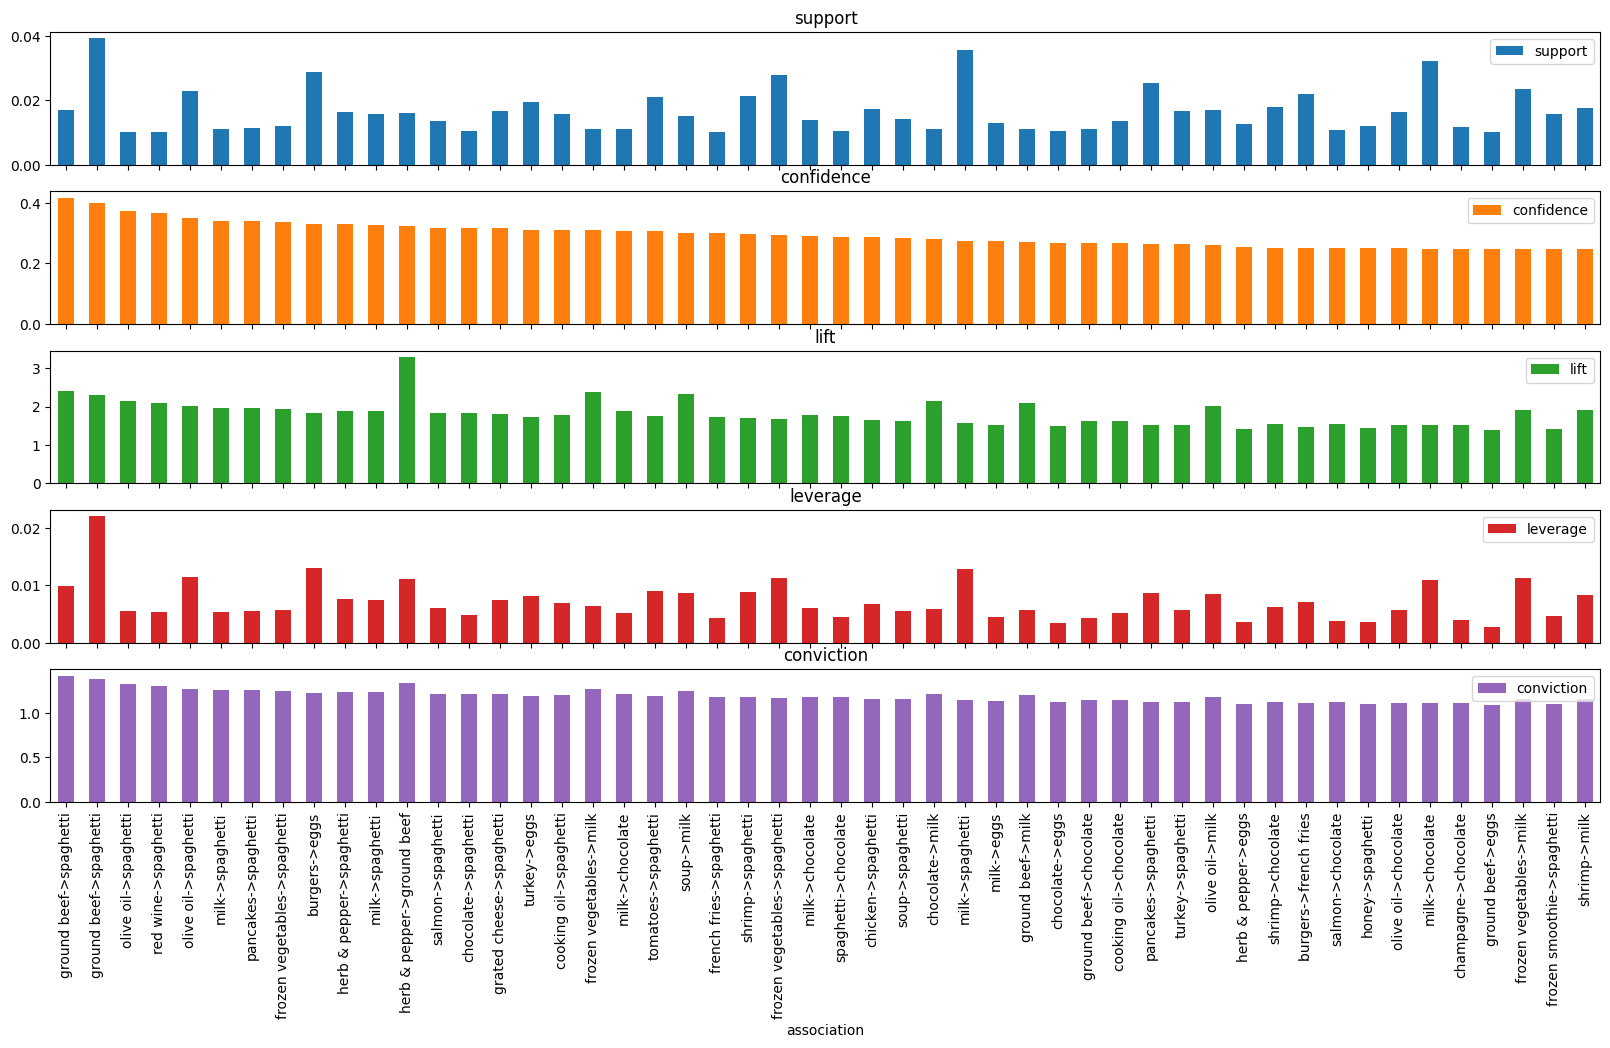

In [161]:
new_rule[['support','confidence','lift','leverage','conviction']].sort_values('confidence',ascending=False)[:50].plot(kind='bar',figsize=(20,10),subplots=True)

In [15]:
# PLOTTING Best and Worst Choices.

Text(0.5, 1.0, 'Best 20 choices')

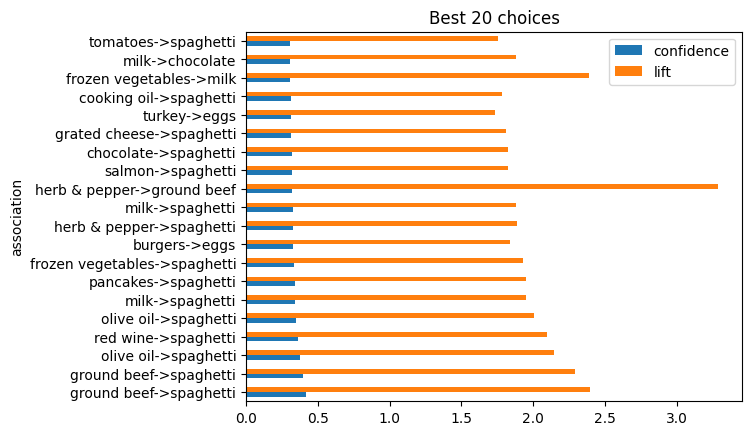

In [168]:
best = new_rule.sort_values(['confidence','lift'], ascending=[False,False])[['confidence','lift']][:20]
best.plot(kind='barh')
plt.title("Best 20 choices")

Text(0.5, 1.0, 'Worst 20 choices')

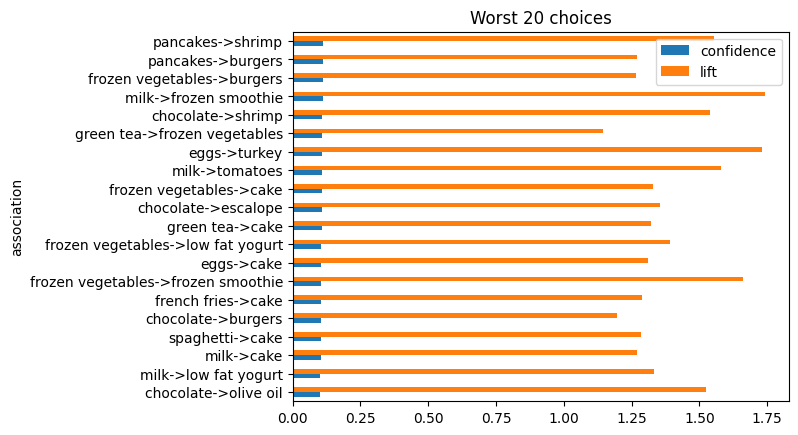

In [170]:
worst = new_rule.sort_values(['confidence','lift'], ascending=[True,True])[['confidence','lift']][:20]
worst.plot(kind='barh')
plt.title("Worst 20 choices")

In [171]:
# cross-selling performance matrix

In [185]:
best_new = new_rule.sort_values(['confidence','lift'], ascending=[False,False])[['antecedents','consequents','confidence','lift']][:20]

<Axes: xlabel='None-consequents', ylabel='antecedents'>

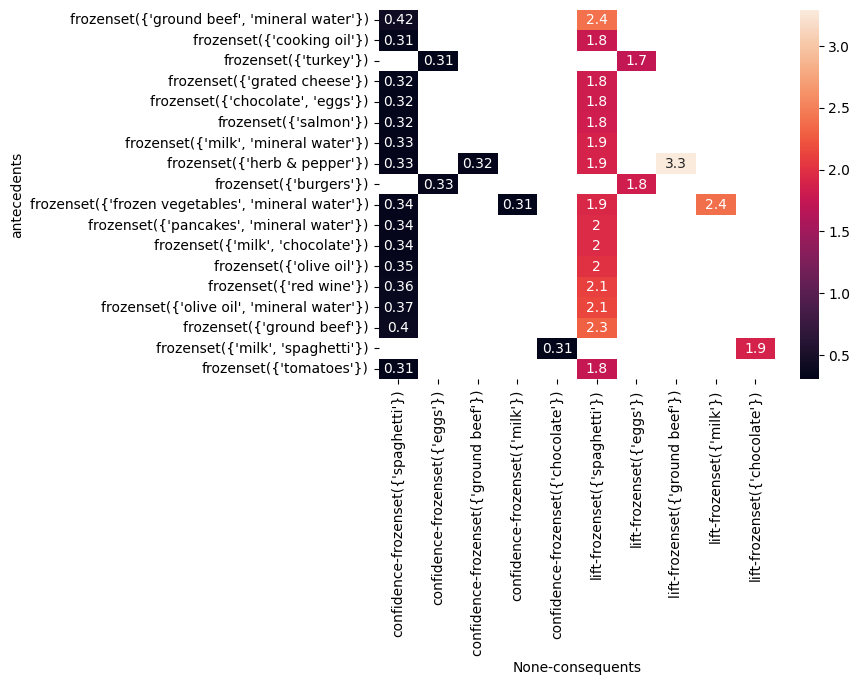

In [191]:
import seaborn as sns
sns.heatmap(best_new.groupby(['antecedents','consequents']).sum().unstack(),annot=True)

In [195]:
best_new = new_rule.sort_values(['lift'], ascending=[False])[['antecedents','consequents','lift']][:20]

<Axes: xlabel='None-consequents', ylabel='antecedents'>

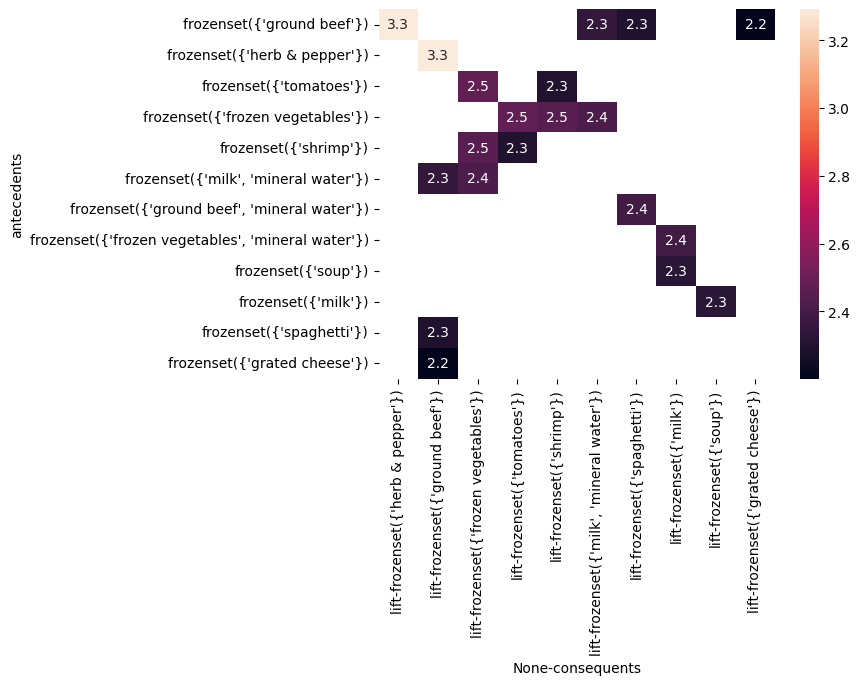

In [196]:
sns.heatmap(best_new.groupby(['antecedents','consequents']).sum().unstack(),annot=True)

In [197]:
best_new = new_rule.sort_values(['lift'], ascending=[False])

<Axes: xlabel='consequents', ylabel='antecedents'>

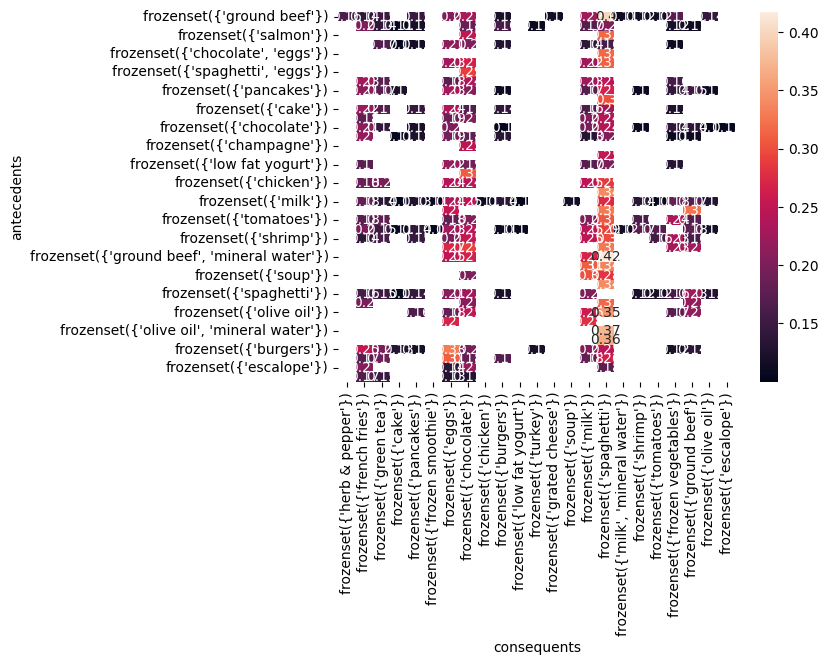

In [209]:
sns.heatmap(best_new.groupby(['antecedents','consequents'])['confidence'].mean().unstack(),annot=True)

In [206]:
best_new

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
association,,,,,,,,,,
ground beef->herb & pepper,(ground beef),(herb & pepper),0.098267,0.049467,0.016000,0.162822,3.291555,0.011139,1.135402,0.772060
herb & pepper->ground beef,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,0.011139,1.332841,0.732423
tomatoes->frozen vegetables,(tomatoes),(frozen vegetables),0.068400,0.095333,0.016133,0.235867,2.474134,0.009613,1.183913,0.639564
frozen vegetables->tomatoes,(frozen vegetables),(tomatoes),0.095333,0.068400,0.016133,0.169231,2.474134,0.009613,1.121370,0.658605
frozen vegetables->shrimp,(frozen vegetables),(shrimp),0.095333,0.071333,0.016667,0.174825,2.450820,0.009866,1.125418,0.654355
...,...,...,...,...,...,...,...,...,...,...
ground beef->french fries,(ground beef),(french fries),0.098267,0.170933,0.013867,0.141113,0.825542,-0.002930,0.965280,-0.189860
shrimp->french fries,(shrimp),(french fries),0.071333,0.170933,0.010000,0.140187,0.820126,-0.002193,0.964241,-0.191051
cookies->chocolate,(cookies),(chocolate),0.080400,0.163867,0.010400,0.129353,0.789381,-0.002775,0.960359,-0.224892
